# Malware Analysis and Detection Using Machine Learning

#### Importing Libraries


In [1]:
import pandas as pd # Pandas is mainly used for data analysis
import numpy as np # NumPy stands for 'Numerical Python'. It is an open-source Python library used to perform various mathematical and scientific tasks.
import seaborn as sns
# The seaborn package was developed based on the Matplotlib library. It is used to create more attractive and informative statistical graphics.
sns.set()
import matplotlib.pyplot as plt # Matplotlib is an amazing visualization library in Python for 2D plots of arrays.
# pyplot is a plotting library used for 2D graphics in python programming language.
# Secondly, pyplot is a module in the matplotlib package.
%matplotlib inline
import random
random.seed(1234)

#### Reading Data

In [2]:
df = pd.read_csv("MalwareData.csv",sep ="|")

In [3]:
df.head()

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,memtest.exe,631ea355665f28d4707448e442fbf5b8,332,224,258,9,0,361984,115712,0,...,4,3.262823,2.568844,3.537939,8797.000000,216,18032,0,16,1
1,ose.exe,9d10f99a6712e28f8acd5641e3a7ea6b,332,224,3330,9,0,130560,19968,0,...,2,4.250461,3.420744,5.080177,837.000000,518,1156,72,18,1
2,setup.exe,4d92f518527353c0db88a70fddcfd390,332,224,3330,9,0,517120,621568,0,...,11,4.426324,2.846449,5.271813,31102.272727,104,270376,72,18,1
3,DW20.EXE,a41e524f8d45f0074fd07805ff0c9b12,332,224,258,9,0,585728,369152,0,...,10,4.364291,2.669314,6.400720,1457.000000,90,4264,72,18,1
4,dwtrig20.exe,c87e561258f2f8650cef999bf643a731,332,224,258,9,0,294912,247296,0,...,2,4.306100,3.421598,5.190603,1074.500000,849,1300,72,18,1


### Shuffling the data

In [4]:
df=df.sample(frac=1).reset_index()
df

,index,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,5298,sdohlp.dll,cecf1cdf63f27c05bdabb62b63770b12,332,224,8450,9,0,283136,75776,...,5,3.733242,2.354318,5.139749,8965.800000,272,42576,72,16,1
1,134996,VirusShare_c4e3b22f141cd15acd0a7dc84392eb1d,c4e3b22f141cd15acd0a7dc84392eb1d,332,224,258,10,0,117248,389632,...,5,3.312743,2.674420,3.764385,2517.600000,48,7336,72,14,0
2,36788,tzres.dll,c6fe13bed404b891de4c77c9af3d27d5,332,224,8450,9,0,0,1536,...,2,3.113412,2.654155,3.572669,558.000000,200,916,0,16,1
3,95160,VirusShare_2c41cca220378d4d4b4150a0db829ed2,2c41cca220378d4d4b4150a0db829ed2,34404,240,35,8,0,82944,53760,...,0,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0
4,60303,VirusShare_58c13662e0eab58f4b44157c0d52bc72,58c13662e0eab58f4b44157c0d52bc72,332,224,258,10,0,119808,385024,...,6,3.752798,2.458492,5.317552,2738.833333,48,9640,72,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138042,31088,mfc120deu.dll,c5ebc101e92d1849a7b3880047fdbca8,34404,240,8226,12,0,0,58368,...,90,3.074283,0.960953,3.578017,591.355556,22,2286,0,16,1
138043,44974,VirusShare_bac633d4d246d2a240d7ab83289fa4d4,bac633d4d246d2a240d7ab83289fa4d4,332,224,258,10,0,119808,385024,...,6,3.752798,2.458492,5.317552,2738.833333,48,9640,72,15,0
138044,100953,VirusShare_1127d0048b5ce1b152076e0216e806a8,1127d0048b5ce1b152076e0216e806a8,332,224,258,11,0,113664,682496,...,7,4.453368,2.623078,7.967002,80992.857143,62,534528,0,0,0
138045,108607,VirusShare_7bc658d18db8bfb1e3781b13168fe587,7bc658d18db8bfb1e3781b13168fe587,332,224,258,10,0,118784,382464,...,26,6.978097,2.458492,7.988532,12840.384615,48,20394,72,14,0


In [5]:
#  The describe() method is used for calculating some statistical data like percentile, mean and std of the numerical values of the Series or DataFrame. 
df.describe()

,index,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
count,138047.000000,138047.000000,138047.000000,138047.000000,138047.000000,138047.000000,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,...,138047.000000,138047.000000,138047.000000,138047.000000,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,138047.000000,138047.000000
mean,69023.000000,4259.069274,225.845632,4444.145994,8.619774,3.819286,2.425956e+05,4.504867e+05,1.009525e+05,1.719561e+05,...,22.050700,4.000127,2.434541,5.521610,5.545093e+04,1.818082e+04,2.465903e+05,4.656750e+05,12.363115,0.299340
std,39850.880643,10880.347245,5.121399,8186.782524,4.088757,11.862675,5.754485e+06,2.101599e+07,1.635288e+07,3.430553e+06,...,136.494244,1.112981,0.815577,1.597403,7.799163e+06,6.502369e+06,2.124860e+07,2.608987e+07,6.798878,0.457971
min,0.000000,332.000000,224.000000,2.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,34511.500000,332.000000,224.000000,258.000000,8.000000,0.000000,3.020800e+04,2.457600e+04,0.000000e+00,1.272100e+04,...,5.000000,3.458505,2.178748,4.828706,9.560000e+02,4.800000e+01,2.216000e+03,0.000000e+00,13.000000,0.000000
50%,69023.000000,332.000000,224.000000,258.000000,9.000000,0.000000,1.136640e+05,2.631680e+05,0.000000e+00,5.288300e+04,...,6.000000,3.729824,2.458492,5.317552,2.708154e+03,4.800000e+01,9.640000e+03,7.200000e+01,15.000000,0.000000
75%,103534.500000,332.000000,224.000000,8226.000000,10.000000,0.000000,1.203200e+05,3.850240e+05,0.000000e+00,6.157800e+04,...,13.000000,4.233051,2.696833,6.502239,6.558429e+03,1.320000e+02,2.378000e+04,7.200000e+01,16.000000,1.000000
max,138046.000000,34404.000000,352.000000,49551.000000,255.000000,255.000000,1.818587e+09,4.294966e+09,4.294941e+09,1.074484e+09,...,7694.000000,7.999723,7.999723,8.000000,2.415919e+09,2.415919e+09,4.294903e+09,4.294967e+09,26.000000,1.000000


In [6]:
# This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138047 entries, 0 to 138046
Data columns (total 58 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   index                        138047 non-null  int64  
 1   Name                         138047 non-null  object 
 2   md5                          138047 non-null  object 
 3   Machine                      138047 non-null  int64  
 4   SizeOfOptionalHeader         138047 non-null  int64  
 5   Characteristics              138047 non-null  int64  
 6   MajorLinkerVersion           138047 non-null  int64  
 7   MinorLinkerVersion           138047 non-null  int64  
 8   SizeOfCode                   138047 non-null  int64  
 9   SizeOfInitializedData        138047 non-null  int64  
 10  SizeOfUninitializedData      138047 non-null  int64  
 11  AddressOfEntryPoint          138047 non-null  int64  
 12  BaseOfCode                   138047 non-null  int64  
 13 

In [7]:
# Drop the Index Column
df = df.drop(["index"],axis=1)
df

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,sdohlp.dll,cecf1cdf63f27c05bdabb62b63770b12,332,224,8450,9,0,283136,75776,0,...,5,3.733242,2.354318,5.139749,8965.800000,272,42576,72,16,1
1,VirusShare_c4e3b22f141cd15acd0a7dc84392eb1d,c4e3b22f141cd15acd0a7dc84392eb1d,332,224,258,10,0,117248,389632,0,...,5,3.312743,2.674420,3.764385,2517.600000,48,7336,72,14,0
2,tzres.dll,c6fe13bed404b891de4c77c9af3d27d5,332,224,8450,9,0,0,1536,0,...,2,3.113412,2.654155,3.572669,558.000000,200,916,0,16,1
3,VirusShare_2c41cca220378d4d4b4150a0db829ed2,2c41cca220378d4d4b4150a0db829ed2,34404,240,35,8,0,82944,53760,0,...,0,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0
4,VirusShare_58c13662e0eab58f4b44157c0d52bc72,58c13662e0eab58f4b44157c0d52bc72,332,224,258,10,0,119808,385024,0,...,6,3.752798,2.458492,5.317552,2738.833333,48,9640,72,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138042,mfc120deu.dll,c5ebc101e92d1849a7b3880047fdbca8,34404,240,8226,12,0,0,58368,0,...,90,3.074283,0.960953,3.578017,591.355556,22,2286,0,16,1
138043,VirusShare_bac633d4d246d2a240d7ab83289fa4d4,bac633d4d246d2a240d7ab83289fa4d4,332,224,258,10,0,119808,385024,0,...,6,3.752798,2.458492,5.317552,2738.833333,48,9640,72,15,0
138044,VirusShare_1127d0048b5ce1b152076e0216e806a8,1127d0048b5ce1b152076e0216e806a8,332,224,258,11,0,113664,682496,0,...,7,4.453368,2.623078,7.967002,80992.857143,62,534528,0,0,0
138045,VirusShare_7bc658d18db8bfb1e3781b13168fe587,7bc658d18db8bfb1e3781b13168fe587,332,224,258,10,0,118784,382464,0,...,26,6.978097,2.458492,7.988532,12840.384615,48,20394,72,14,0


In [8]:
# The shape is use for printing the value of Rows and Columns
df.shape

(138047, 57)

### Notes : 
### Here the **Legitimate files or the Clean Files** contain **(.exe) and (.dll) extension** format
### whereas file names **start with "VirusShare_"** are the **malware files**

In [9]:
# showing total numbers of 0 (Malecious File) and 1 (Clean File) in legitimate columns

df['legitimate'].value_counts()
#index_1 = df["legitimate"] == 1
#df[index_1].count()
#index = df["legitimate"] == 0
#df[index].count()

0    96724
1    41323
Name: legitimate, dtype: int64

In [10]:
# display all columns name
df.columns

Index(['Name', 'md5', 'Machine', 'SizeOfOptionalHeader', 'Characteristics',
       'MajorLinkerVersion', 'MinorLinkerVersion', 'SizeOfCode',
       'SizeOfInitializedData', 'SizeOfUninitializedData',
       'AddressOfEntryPoint', 'BaseOfCode', 'BaseOfData', 'ImageBase',
       'SectionAlignment', 'FileAlignment', 'MajorOperatingSystemVersion',
       'MinorOperatingSystemVersion', 'MajorImageVersion', 'MinorImageVersion',
       'MajorSubsystemVersion', 'MinorSubsystemVersion', 'SizeOfImage',
       'SizeOfHeaders', 'CheckSum', 'Subsystem', 'DllCharacteristics',
       'SizeOfStackReserve', 'SizeOfStackCommit', 'SizeOfHeapReserve',
       'SizeOfHeapCommit', 'LoaderFlags', 'NumberOfRvaAndSizes', 'SectionsNb',
       'SectionsMeanEntropy', 'SectionsMinEntropy', 'SectionsMaxEntropy',
       'SectionsMeanRawsize', 'SectionsMinRawsize', 'SectionMaxRawsize',
       'SectionsMeanVirtualsize', 'SectionsMinVirtualsize',
       'SectionMaxVirtualsize', 'ImportsNbDLL', 'ImportsNb',
       'Impor

### Correlation
#### Pearson Correlation.

In [11]:
corr = df.corr("pearson")
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

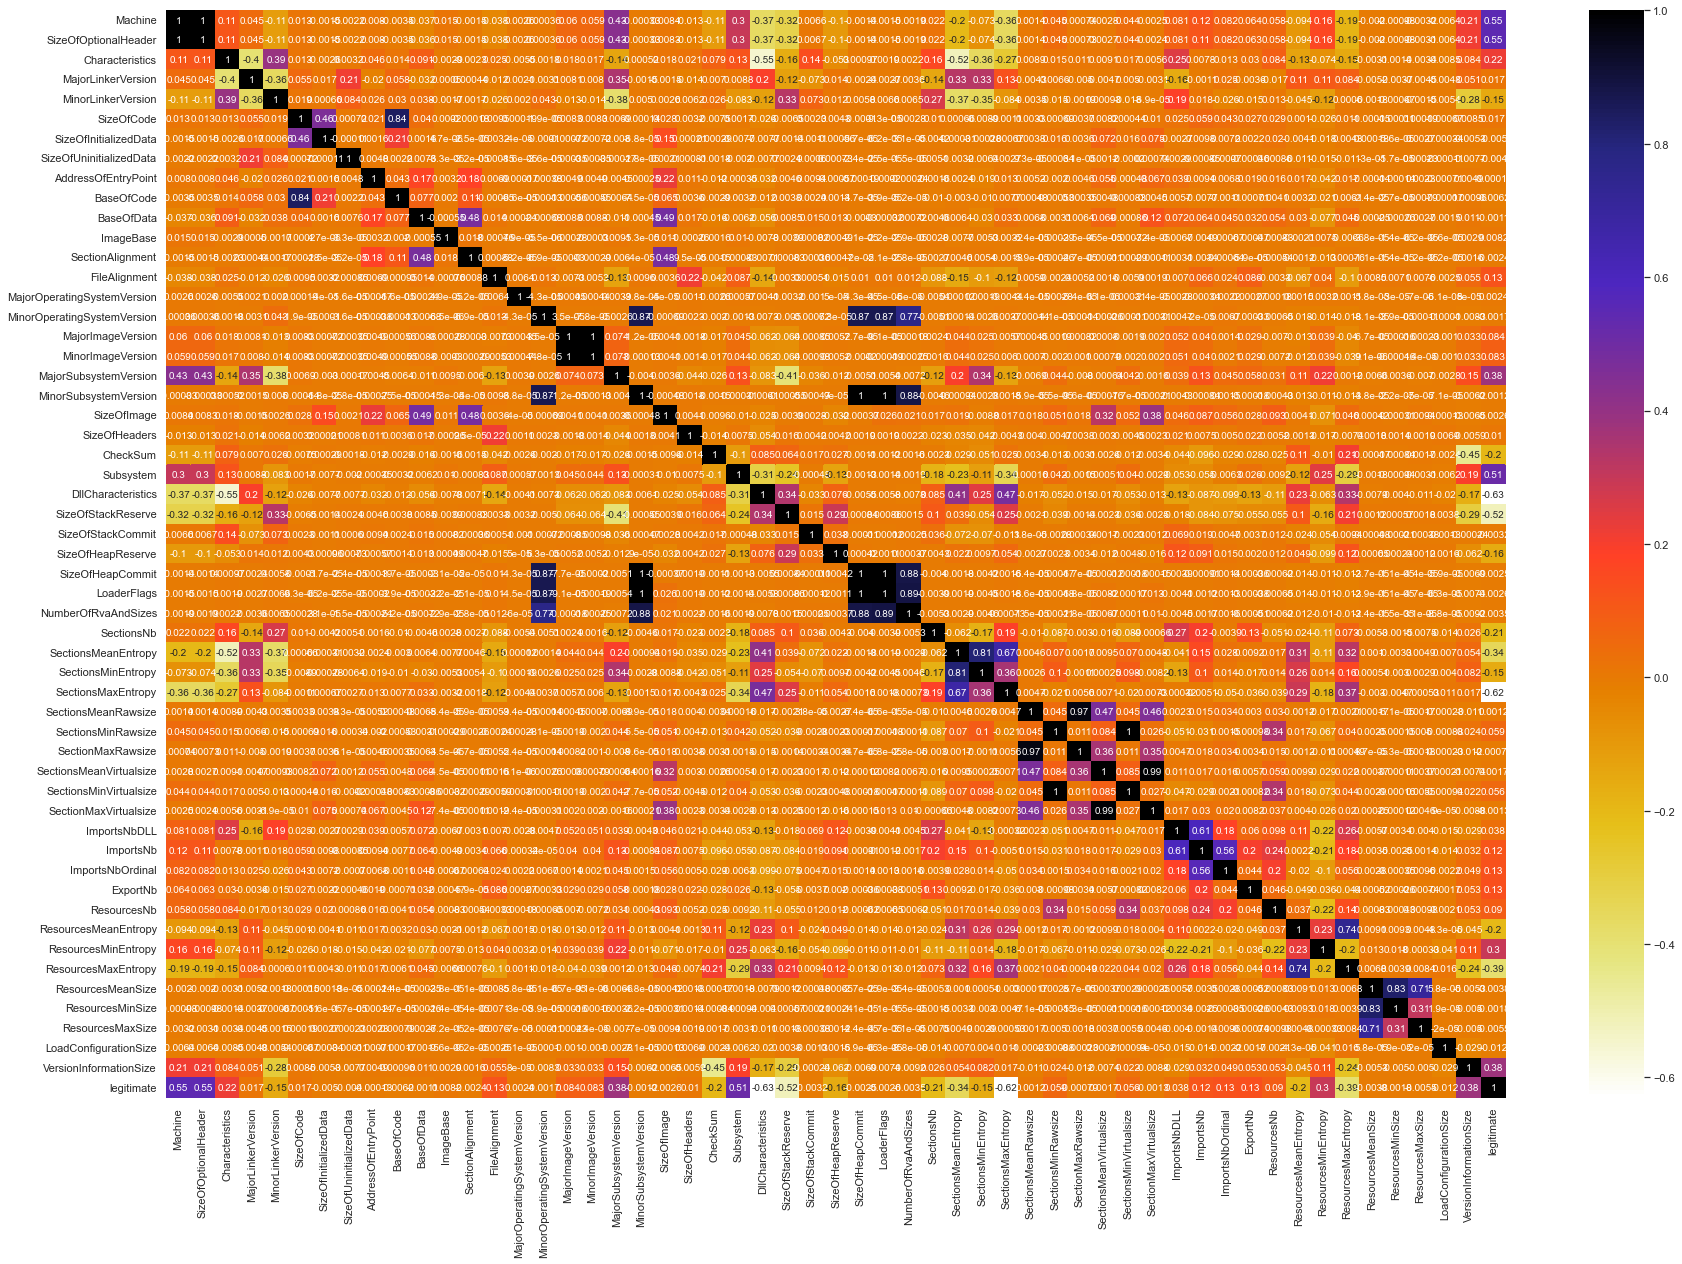

In [12]:
plt.figure(figsize=(30,20))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

## Find the correlation between every pair of columns
### Correlation: 
### +1 to -1
### +1 highest positive correlation
### -1 highest negative correlation
### 0 there is no correlation or two variables are independent of each other


# Features Selection :
## Correlation with output variable
### Print all those columns which have 
### absolute correlation with target column (legitimate) > 0.2

In [13]:
corr_target = abs(corr['legitimate'])

In [14]:
print(corr_target.sort_values())

AddressOfEntryPoint            0.000134
SectionMaxRawsize              0.000790
BaseOfData                     0.001136
SectionsMeanRawsize            0.001175
MinorSubsystemVersion          0.001213
SectionMaxVirtualsize          0.001332
MinorOperatingSystemVersion    0.001702
SectionsMeanVirtualsize        0.001734
ResourcesMinSize               0.001774
MajorOperatingSystemVersion    0.002402
SectionAlignment               0.002429
SizeOfHeapCommit               0.002506
SizeOfImage                    0.002603
LoaderFlags                    0.002649
SizeOfStackCommit              0.003226
NumberOfRvaAndSizes            0.003523
ResourcesMeanSize              0.003824
SizeOfUninitializedData        0.003997
SizeOfInitializedData          0.004958
ResourcesMaxSize               0.005529
BaseOfCode                     0.006232
ImageBase                      0.008245
SizeOfHeaders                  0.010125
LoadConfigurationSize          0.011666
MajorLinkerVersion             0.017320


## Selecting highly correlated features

In [15]:
relevant_features = corr_target[corr_target>0.2]
relevant_features
df1 = relevant_features.sort_values()
df1

ResourcesMeanEntropy      0.202432
SectionsNb                0.207782
Characteristics           0.221956
ResourcesMinEntropy       0.299112
SectionsMeanEntropy       0.343933
VersionInformationSize    0.379646
MajorSubsystemVersion     0.380393
ResourcesMaxEntropy       0.392855
Subsystem                 0.514352
SizeOfStackReserve        0.521642
SizeOfOptionalHeader      0.547498
Machine                   0.548835
SectionsMaxEntropy        0.624229
DllCharacteristics        0.630177
legitimate                1.000000
Name: legitimate, dtype: float64

In [16]:
col = ["ResourcesMeanEntropy","SectionsNb","Characteristics","ResourcesMinEntropy","SectionsMeanEntropy","VersionInformationSize","MajorSubsystemVersion","ResourcesMaxEntropy","Subsystem","SizeOfStackReserve","SizeOfOptionalHeader","Machine","SizeOfOptionalHeader","DllCharacteristics"]
df2 = df[col]
df2.head()

,ResourcesMeanEntropy,SectionsNb,Characteristics,ResourcesMinEntropy,SectionsMeanEntropy,VersionInformationSize,MajorSubsystemVersion,ResourcesMaxEntropy,Subsystem,SizeOfStackReserve,SizeOfOptionalHeader,Machine,SizeOfOptionalHeader,DllCharacteristics
0,3.733242,4,8450,2.354318,5.761349,16,6,5.139749,3,262144,224,332,224,320
1,3.312743,5,258,2.674420,5.627823,14,5,3.764385,2,1048576,224,332,224,33088
2,3.113412,1,8450,2.654155,2.967532,16,6,3.572669,2,262144,224,332,224,1344
3,0.000000,4,35,0.000000,4.441116,0,5,0.000000,2,1048576,240,34404,240,32768
4,3.752798,5,258,2.458492,5.659356,15,5,5.317552,2,1048576,224,332,224,33088


## Visualization

D:\anaconda\envs\pythonProject\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda\envs\pythonProject\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda\envs\pythonProject\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `hist

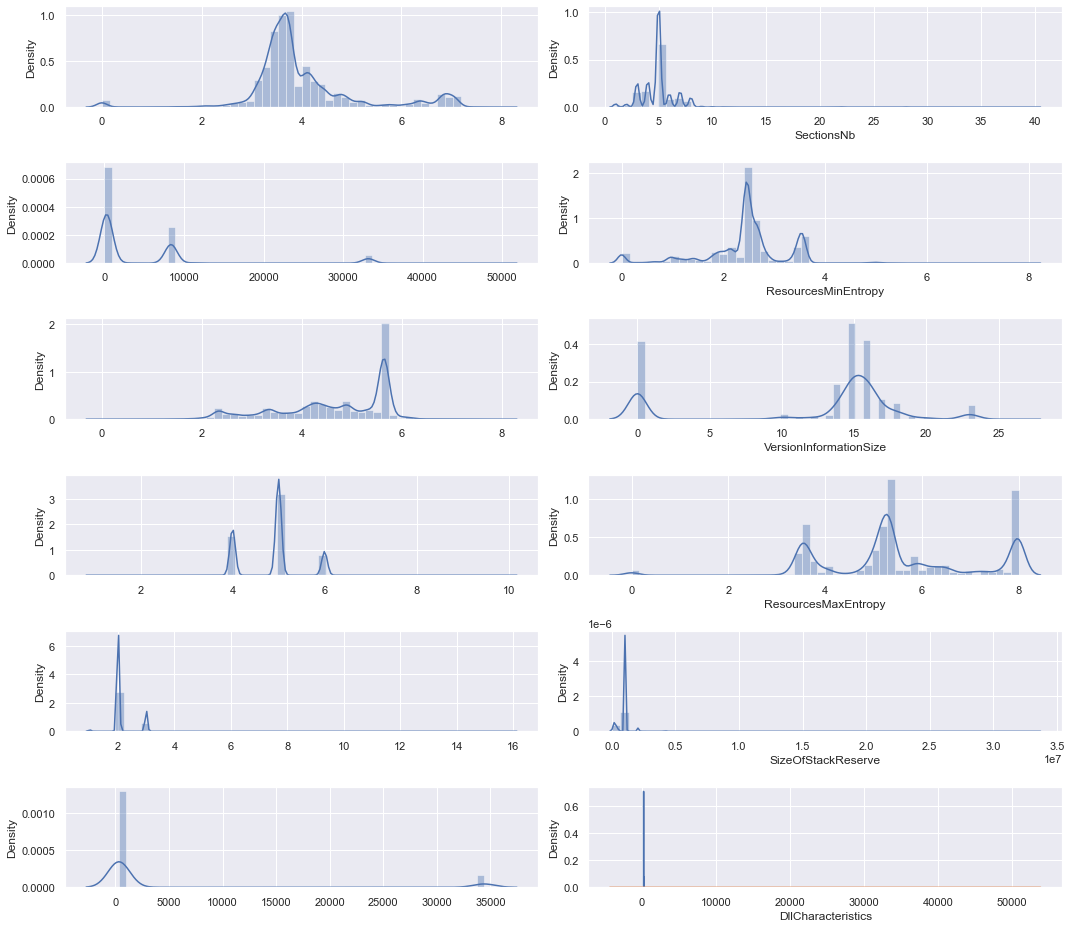

In [17]:
fig, ax = plt.subplots(6, 2, figsize = (15, 13))
sns.distplot(x= df["ResourcesMeanEntropy"], ax = ax[0,0])
sns.distplot(df['SectionsNb'], ax = ax[0,1])
sns.distplot(x= df["Characteristics"], ax = ax[1,0])
sns.distplot(df['ResourcesMinEntropy'], ax = ax[1,1])
sns.distplot(x= df["SectionsMeanEntropy"], ax = ax[2,0])
sns.distplot(df['VersionInformationSize'], ax = ax[2,1])
sns.distplot(x= df["MajorSubsystemVersion"], ax = ax[3,0])
sns.distplot(df['ResourcesMaxEntropy'], ax = ax[3,1])
sns.distplot(x= df["Subsystem"], ax = ax[4,0])
sns.distplot(df['SizeOfStackReserve'], ax = ax[4,1])
sns.distplot(x= df["Machine"], ax = ax[5,0])
sns.distplot(df['SizeOfOptionalHeader'], ax = ax[5,1])
sns.distplot(df['DllCharacteristics'], ax = ax[5,1])
plt.tight_layout()



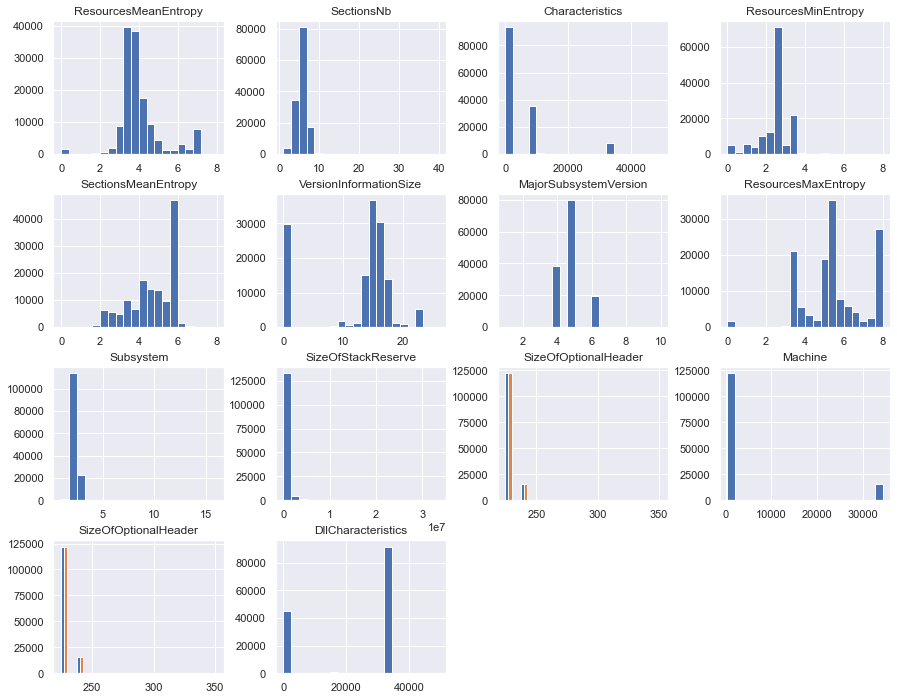

In [18]:
df2.hist(figsize=(15,12),bins=20)
plt.show()

## Split the data in X and Y
here*** Y will be Legitimate*** and **all the other 14 features will be X**
So after executing this code X and Y will be Seperated
after seperation check the shape of the Data
**there should always be only one column in Y shape OR No of rows in both X and Y should be same**

In [19]:
X = df[["ResourcesMeanEntropy","SectionsNb","Characteristics","ResourcesMinEntropy","SectionsMeanEntropy","VersionInformationSize","MajorSubsystemVersion","ResourcesMaxEntropy","Subsystem","SizeOfStackReserve","SizeOfOptionalHeader","Machine","SizeOfOptionalHeader","DllCharacteristics"]]
Y = df['legitimate'] 

## Split the data in Training and testing
### To Check the shape of X train and test , Y train and test

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=7)

In [21]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((96632, 14), (41415, 14), (96632,), (41415,))

## Apply Decision Tree Classifier

In [22]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [23]:
dtc.fit(X_train,Y_train)

DecisionTreeClassifier()

In [24]:
accuracy1 = (dtc.score(X_test, Y_test))*100
accuracy1

98.95207050585537

__Construct a Tree using Graphviz__

In [26]:
'''import graphviz
from sklearn import tree
TREE = tree.export_graphviz(dtc, out_file=None, 
                        feature_names=list(X_train),  
                       filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(TREE)  
graph
'''

ModuleNotFoundError: No module named 'graphviz'

# Ensemble techniques

## **Apply Random Forest Classifier** 

In [1]:
from sklearn.ensemble import RandomForestClassifier
rcf = RandomForestClassifier(n_estimators=50,random_state=7)


### fit the model in X_train and Y_train

In [2]:
rcf.fit(X_train,Y_train)

NameError: name 'X_train' is not defined

## Predict the Accuracy and Score 

In [ ]:
accuracy2 = (rcf.score(X_test, Y_test))*100
accuracy2

### Draw the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
result = rcf.predict(X_test)
conf = confusion_matrix(Y_test,result)
conf

In [ ]:
type(conf)

In [ ]:
print("False Positive : ",conf[0][1]/sum(conf[0])*100)
print("False Negative : ",conf[1][0]/sum(conf[1])*100)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,result))

## **Apply Gradient Boosting Classifier** 

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=50)

### fit the model in X_train and Y_train

In [ ]:
gbc.fit(X_train,Y_train)

### Predict the Accuracy and Score 

In [ ]:
gbc.predict(X_test)


In [ ]:
accuracy3 = (gbc.score(X_test, Y_test))*100
accuracy3

In [ ]:
x= ["Decision Tree","Random Forest","Gradient Boost"]
y =np.array([accuracy1, accuracy2, accuracy3])

In [ ]:
plt.bar(x,y,color=['seagreen', 'yellow', 'blue'])
plt.xlabel('Models')
plt.ylabel("Accuracy")
plt.title('Bar Plot for the acuuracies')
plt.show()


## **Performing the Prediction-model on the Sample Test Data** 

In [ ]:
t = X_test.head(1)
t

In [ ]:
t=np.array(t)
t

In [ ]:
result = rcf.predict(t)
result

In [ ]:
result[0]

In [ ]:
Y_test.head(1)

In [ ]:
df.iloc[94191]

In [ ]:
import pickle
with open ("model.pkl","wb") as file:
    pickle.dump(rcf,file)

In [ ]:
with open("model.pkl","rb") as file:
    model = pickle.load(file)

In [ ]:
print(model.predict(t))

In [ ]:
#The phrase File Entropy is used to measure the amount of data which is present in a selected file. For example, if you have some files and desire to calculate the entropy value for that, then it will be very simple by accessing the methods of File Entropy and its calculation process.
def get_entropy(data):
    if len(data) == 0:
        return 0.0
    occurences = array.array('L', [0] * 256)
    for x in data:
        occurences[x if isinstance(x, int) else ord(x)] += 1

    entropy = 0
    for x in occurences:
        if x:
            p_x = float(x) / len(data)
            entropy -= p_x * math.log(p_x, 2)

    return entropy


def get_resources(pe):
    """Extract resources :
    [entropy, size]"""
    resources = []
    if hasattr(pe, 'DIRECTORY_ENTRY_RESOURCE'):
        try:
            for resource_type in pe.DIRECTORY_ENTRY_RESOURCE.entries:
                if hasattr(resource_type, 'directory'):
                    for resource_id in resource_type.directory.entries:
                        if hasattr(resource_id, 'directory'):
                            for resource_lang in resource_id.directory.entries:
                                data = pe.get_data(resource_lang.data.struct.OffsetToData,
                                                   resource_lang.data.struct.Size)
                                size = resource_lang.data.struct.Size
                                entropy = get_entropy(data)

                                resources.append([entropy, size])
        except Exception as e:
            return resources
    return resources


def get_version_info(pe):
    """Return version infos"""
    res = {}
    for fileinfo in pe.FileInfo:
        if fileinfo.Key == 'StringFileInfo':
            for st in fileinfo.StringTable:
                for entry in st.entries.items():
                    res[entry[0]] = entry[1]
        if fileinfo.Key == 'VarFileInfo':
            for var in fileinfo.Var:
                res[var.entry.items()[0][0]] = var.entry.items()[0][1]
    if hasattr(pe, 'VS_FIXEDFILEINFO'):
        res['flags'] = pe.VS_FIXEDFILEINFO.FileFlags
        res['os'] = pe.VS_FIXEDFILEINFO.FileOS
        res['type'] = pe.VS_FIXEDFILEINFO.FileType
        res['file_version'] = pe.VS_FIXEDFILEINFO.FileVersionLS
        res['product_version'] = pe.VS_FIXEDFILEINFO.ProductVersionLS
        res['signature'] = pe.VS_FIXEDFILEINFO.Signature
        res['struct_version'] = pe.VS_FIXEDFILEINFO.StrucVersion
    return res


def extract_infos(fpath):
    res = {}
    pe = pefile.PE(fpath)
    res['Machine'] = pe.FILE_HEADER.Machine
    res['SizeOfOptionalHeader'] = pe.FILE_HEADER.SizeOfOptionalHeader
    res['Characteristics'] = pe.FILE_HEADER.Characteristics
    res['MajorLinkerVersion'] = pe.OPTIONAL_HEADER.MajorLinkerVersion
    res['MinorLinkerVersion'] = pe.OPTIONAL_HEADER.MinorLinkerVersion
    res['SizeOfCode'] = pe.OPTIONAL_HEADER.SizeOfCode
    res['SizeOfInitializedData'] = pe.OPTIONAL_HEADER.SizeOfInitializedData
    res['SizeOfUninitializedData'] = pe.OPTIONAL_HEADER.SizeOfUninitializedData
    res['AddressOfEntryPoint'] = pe.OPTIONAL_HEADER.AddressOfEntryPoint
    res['BaseOfCode'] = pe.OPTIONAL_HEADER.BaseOfCode
    try:
        res['BaseOfData'] = pe.OPTIONAL_HEADER.BaseOfData
    except AttributeError:
        res['BaseOfData'] = 0
    res['ImageBase'] = pe.OPTIONAL_HEADER.ImageBase
    res['SectionAlignment'] = pe.OPTIONAL_HEADER.SectionAlignment
    res['FileAlignment'] = pe.OPTIONAL_HEADER.FileAlignment
    res['MajorOperatingSystemVersion'] = pe.OPTIONAL_HEADER.MajorOperatingSystemVersion
    res['MinorOperatingSystemVersion'] = pe.OPTIONAL_HEADER.MinorOperatingSystemVersion
    res['MajorImageVersion'] = pe.OPTIONAL_HEADER.MajorImageVersion
    res['MinorImageVersion'] = pe.OPTIONAL_HEADER.MinorImageVersion
    res['MajorSubsystemVersion'] = pe.OPTIONAL_HEADER.MajorSubsystemVersion
    res['MinorSubsystemVersion'] = pe.OPTIONAL_HEADER.MinorSubsystemVersion
    res['SizeOfImage'] = pe.OPTIONAL_HEADER.SizeOfImage
    res['SizeOfHeaders'] = pe.OPTIONAL_HEADER.SizeOfHeaders
    res['CheckSum'] = pe.OPTIONAL_HEADER.CheckSum
    res['Subsystem'] = pe.OPTIONAL_HEADER.Subsystem
    res['DllCharacteristics'] = pe.OPTIONAL_HEADER.DllCharacteristics
    res['SizeOfStackReserve'] = pe.OPTIONAL_HEADER.SizeOfStackReserve
    res['SizeOfStackCommit'] = pe.OPTIONAL_HEADER.SizeOfStackCommit
    res['SizeOfHeapReserve'] = pe.OPTIONAL_HEADER.SizeOfHeapReserve
    res['SizeOfHeapCommit'] = pe.OPTIONAL_HEADER.SizeOfHeapCommit
    res['LoaderFlags'] = pe.OPTIONAL_HEADER.LoaderFlags
    res['NumberOfRvaAndSizes'] = pe.OPTIONAL_HEADER.NumberOfRvaAndSizes

    # Sections
    res['SectionsNb'] = len(pe.sections)
    entropy = list(map(lambda x:x.get_entropy(), pe.sections))
    res['SectionsMeanEntropy'] = sum(entropy)/float(len(entropy))
    res['SectionsMinEntropy'] = min(entropy)
    res['SectionsMaxEntropy'] = max(entropy)


    raw_sizes = list(map(lambda x:x.SizeOfRawData, pe.sections))
    res['SectionsMeanRawsize'] = sum(raw_sizes)/float(len(raw_sizes))
    res['SectionsMinRawsize'] = min(raw_sizes)
    res['SectionsMaxRawsize'] = max(raw_sizes)
    virtual_sizes = list(map(lambda x:x.Misc_VirtualSize, pe.sections))
    res['SectionsMeanVirtualsize'] = sum(virtual_sizes)/float(len(virtual_sizes))
    res['SectionsMinVirtualsize'] = min(virtual_sizes)
    res['SectionMaxVirtualsize'] = max(virtual_sizes)

    #Imports
    try:
        res['ImportsNbDLL'] = len(pe.DIRECTORY_ENTRY_IMPORT)
        imports = list(sum([x.imports for x in pe.DIRECTORY_ENTRY_IMPORT], []))
        res['ImportsNb'] = len(imports)
        res['ImportsNbOrdinal'] = len(list(filter(lambda x:x.name is None, imports)))
    except AttributeError:
        res['ImportsNbDLL'] = 0
        res['ImportsNb'] = 0
        res['ImportsNbOrdinal'] = 0

    #Exports
    try:
        res['ExportNb'] = len(pe.DIRECTORY_ENTRY_EXPORT.symbols)
    except AttributeError:
        # No export
        res['ExportNb'] = 0
    #Resources
    resources= get_resources(pe)
    res['ResourcesNb'] = len(resources)
    if len(resources)> 0:
        entropy = list(map(lambda x:x[0], resources))
        res['ResourcesMeanEntropy'] = sum(entropy)/float(len(entropy))
        res['ResourcesMinEntropy'] = min(entropy)
        res['ResourcesMaxEntropy'] = max(entropy)
        sizes = list(map(lambda x:x[1], resources))
        res['ResourcesMeanSize'] = sum(sizes)/float(len(sizes))
        res['ResourcesMinSize'] = min(sizes)
        res['ResourcesMaxSize'] = max(sizes)
    else:
        res['ResourcesNb'] = 0
        res['ResourcesMeanEntropy'] = 0
        res['ResourcesMinEntropy'] = 0
        res['ResourcesMaxEntropy'] = 0
        res['ResourcesMeanSize'] = 0
        res['ResourcesMinSize'] = 0
        res['ResourcesMaxSize'] = 0

    # Load configuration size
    try:
        res['LoadConfigurationSize'] = pe.DIRECTORY_ENTRY_LOAD_CONFIG.struct.Size
    except AttributeError:
        res['LoadConfigurationSize'] = 0


    # Version configuration size
    try:
        version_infos = get_version_info(pe)
        res['VersionInformationSize'] = len(version_infos.keys())
    except AttributeError:
        res['VersionInformationSize'] = 0
    return res

In [ ]:
import pefile
import os
import array
import math
import pickle
import joblib
import sys
import argparse
import os, sys, shutil, time
import re
import pandas as pd

data = extract_infos("TestDummy2.exe")

In [ ]:
test=[data['ResourcesMeanEntropy'],data['SectionsNb'],data['Characteristics'],data['ResourcesMinEntropy'],data['SectionsMeanEntropy'],data['VersionInformationSize'],data['MajorSubsystemVersion'],data['ResourcesMaxEntropy'],data['Subsystem'],data['SizeOfStackReserve'],data['SizeOfOptionalHeader'],data['Machine'],data['SizeOfOptionalHeader'],data['DllCharacteristics']]

In [ ]:
print(model.predict([test]))